In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [ ]:
fileName = 'H-H1_LOSC_4_V1-815411200-4096.hdf5'
dataFile = h5py.File(fileName, 'r')

In [ ]:
for key in dataFile.keys():
    print(key)

meta
quality
strain


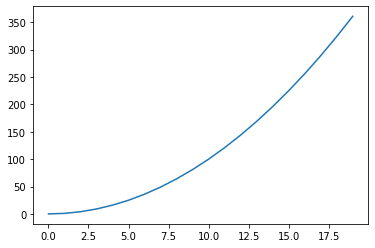

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
vector=np.arange(20)
plt.plot(vector**2)
plt.show()

In [ ]:
strain = dataFile['strain']['Strain'].value
ts = dataFile['strain']['Strain'].attrs['Xspacing']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


In [ ]:
print ("\n\n")
metaKeys = dataFile['meta'].keys()
meta = dataFile['meta']
for key in metaKeys:
    print (key, meta[key].value)




Description b'Strain data time series from LIGO'
DescriptionURL b'http://losc.ligo.org/'
Detector b'H1'
Duration 4096
GPSstart 815411200
Observatory b'H'
Type b'StrainTimeSeries'
UTCstart b'2005-11-07T15:06:27'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """


In [ ]:
gpsStart = meta['GPSstart'].value
duration = meta['Duration'].value
gpsEnd   = gpsStart + duration

time = np.arange(gpsStart, gpsEnd, ts)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  


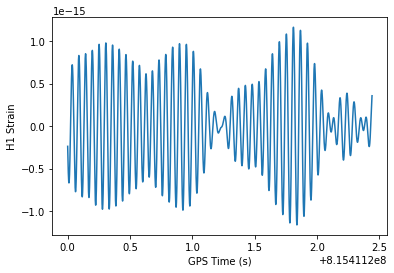

In [ ]:
numSamples = 10000
plt.plot(time[0:numSamples], strain[0:numSamples])
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()

In [ ]:
print ("\n\n")
metaKeys = dataFile['meta'].keys()
meta = dataFile['meta']
for key in metaKeys:
    print (key, meta[key].value)




Description b'Strain data time series from LIGO'
DescriptionURL b'http://losc.ligo.org/'
Detector b'H1'
Duration 4096
GPSstart 815411200
Observatory b'H'
Type b'StrainTimeSeries'
UTCstart b'2005-11-07T15:06:27'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

filename = 'H-H1_LOSC_4_V1-815411200-4096.hdf5'
dataFile = h5py.File(filename, 'r')
gpsStart = dataFile['meta']['GPSstart'].value

dqInfo = dataFile['quality']['simple']
bitnameList = dqInfo['DQShortnames'].value
nbits = len(bitnameList)

for bit in range(nbits):
    print (bit, bitnameList[bit])

0 b'DATA'
1 b'CBCHIGH_CAT1'
2 b'CBCHIGH_CAT2'
3 b'CBCHIGH_CAT3'
4 b'CBCHIGH_CAT4'
5 b'CBCLOW_CAT1'
6 b'CBCLOW_CAT2'
7 b'CBCLOW_CAT3'
8 b'CBCLOW_CAT4'
9 b'BURST_CAT1'
10 b'BURST_CAT2'
11 b'BURST_CAT3'
12 b'BURST_CAT2E'
13 b'BURST_CAT3E'
14 b'CW_CAT1'
15 b'STOCH_CAT1'
16 b'STOCH_CAT2_H1L1'
17 b'STOCH_CAT2_H2L1'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
qmask = dqInfo['DQmask'].value

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


In [ ]:
sci = (qmask >> 0) & 1
burst1  = (qmask >> 9) & 1

In [ ]:
goodData_1hz = sci & burst1

Text(0.5, 0, 'Time (s)')

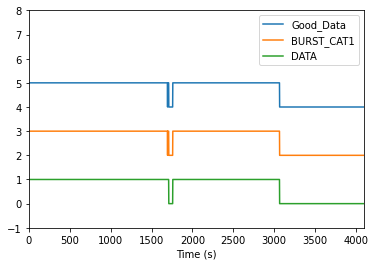

In [ ]:
plt.plot(goodData_1hz + 4, label='Good_Data')
plt.plot(burst1 + 2, label='BURST_CAT1')
plt.plot(sci, label='DATA')
plt.axis([0, 4096, -1, 8])
plt.legend(loc=1)
plt.xlabel('Time (s)')

In [ ]:
dummy = np.zeros(goodData_1hz.shape)
masked_dummy = np.ma.masked_array(dummy, np.logical_not(goodData_1hz) )
segments = np.ma.flatnotmasked_contiguous(masked_dummy)
segList = [(int(seg.start+gpsStart), int(seg.stop+gpsStart)) for seg in segments]

In [ ]:
!pip install readligo

ERROR: Could not find a version that satisfies the requirement readligo (from versions: none)
ERROR: No matching distribution found for readligo


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import readligo as rl

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
strain, time, chan_dict = rl.loaddata(
                          'H-H1_LOSC_4_V1-815411200-4096.hdf5', 'H1')

/content/readligo.py:155: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  shortnameArray = dqInfo['DQShortnames'].value
/content/readligo.py:161: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  injnameArray = injInfo['InjShortnames'].value
/content/readligo.py:166: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  gpsStart = meta['GPSstart'].value


In [ ]:
slice_list = rl.dq_channel_to_seglist(chan_dict['DATA'])
for slice in slice_list:
    time_seg = time[slice]
    strain_seg = strain[slice]
    # -- Do stuff with strain segment here

In [ ]:
start = 815411200
stop =  815411201
segList = rl.getsegs(start, stop, 'H1', flag='CBCLOW_CAT2')

Using data directory . ...


/content/readligo.py:155: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  shortnameArray = dqInfo['DQShortnames'].value
/content/readligo.py:161: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  injnameArray = injInfo['InjShortnames'].value
/content/readligo.py:166: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  gpsStart = meta['GPSstart'].value
